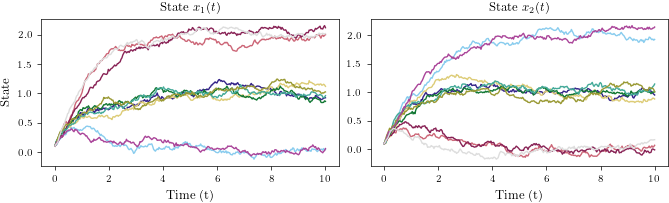

In [22]:
from src.sdes import sde_cell_model, sde_data
import jax

import matplotlib.pyplot as plt
from tueplots import bundles, axes, cycler, figsizes
from tueplots.constants.color import palettes

bundle = bundles.aistats2023()
plt.rcParams.update(bundle)
plt.rcParams.update(cycler.cycler(color=palettes.paultol_muted))
plt.rcParams.update(axes.lines())
plt.rcParams.update(figsizes.aistats2022_full(nrows=1, ncols=2))

x0 = [.1, .1]
T = 10.
N = 300

cell_model = sde_cell_model.cell_model(T, N)

keys = jax.random.split(jax.random.PRNGKey(0), 10)
data_generator = sde_data.data_forward(x0, cell_model)
_, forward_trajs, correction = data_generator(keys)

fig, axs = plt.subplots(1, 2, sharex=True)

for traj in forward_trajs:
    axs[0].plot(cell_model.time_grid, traj[..., 0])
    axs[1].plot(cell_model.time_grid, traj[..., 1])
    
axs[0].set_title(r'State $x_1(t)$')
axs[1].set_title(r'State $x_2(t)$')
axs[0].set_xlabel('Time (t)')
axs[1].set_xlabel('Time (t)')
axs[0].set_ylabel(r'State')

plt.savefig('cell_model_forward_trajs.pdf')

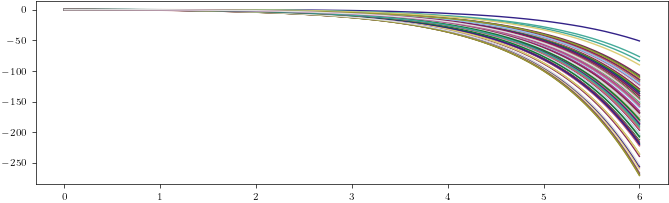

<function matplotlib.pyplot.show(close=None, block=None)>

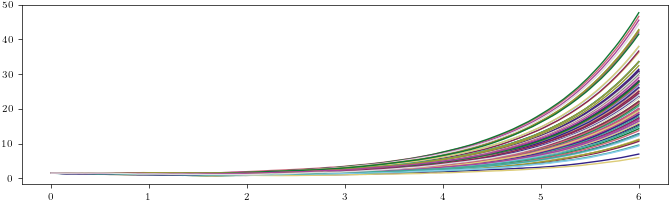

In [16]:
from src.sdes import sde_cell_model
import matplotlib.pyplot as plt
import jax


y = [0.1, 1.5]
keys = jax.random.split(jax.random.PRNGKey(0), 100)

data_generator = sde_data.data_adjoint(y, cell_model)
_, rev_trajs, correction = data_generator(keys)

for traj in rev_trajs:
        plt.plot(cell_model.time_grid_reverse, traj[..., 0])
plt.show()
    
for traj in rev_trajs:
    plt.plot(cell_model.time_grid_reverse, traj[..., 1])
plt.show